In [7]:

from tensorflow import keras
from tensorflow.keras import layers

In [4]:
inputs = keras.Input(shape=(32, 32, 3), name='img')
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs, name='toy_resnet')


inputs = keras.Input(shape=(32, 32, 3), name='img')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
inputs = keras.Input(shape=(32, 32, 3), name='img')
x = layers.Conv2D(32, 3, activation='relu')

In [11]:
x1=x(inputs)
print('works')
x1.shape

works


TensorShape([Dimension(None), Dimension(30), Dimension(30), Dimension(32)])

In [6]:
model = keras.Model(inputs, x, name='toy_resnet')

AttributeError: 'Conv2D' object has no attribute 'op'

In [3]:
x1.shape

NameError: name 'x1' is not defined

In [2]:
inputs = keras.Input(shape=(784,), name='img')
x1 = layers.Dense(64, activation='relu')(inputs)

model = keras.Model(inputs=inputs, outputs=x1, name='mnist_model')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
x = layers.Dense(64, activation='relu')
print('here')


here


In [3]:
outputs = layers.Dense(10, activation='softmax')


In [5]:
inputs = keras.Input(shape=(32, 32, 3), name='img')


In [6]:
outputs =outputs(x(inputs))



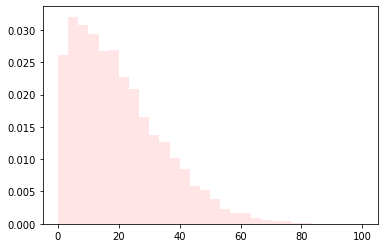

In [16]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
%matplotlib inline

numValues = 10000
maxValue = 100
skewness = 100   #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

random = random - min(random)      #Shift the set so the minimum value is equal to zero.
random = random / max(random)      #Standadize all the vlues between 0 and 1. 
random = random * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(random,30,density=True, color = 'red', alpha=0.1)
plt.show()

[0.69838165 0.45909221 2.61474984 1.32331027 0.6638383 ]


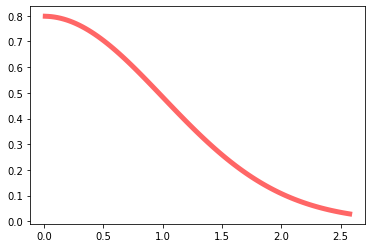

In [20]:
from scipy.stats import halfnorm
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1)
x = np.linspace(halfnorm.ppf(0.01),
              halfnorm.ppf(0.99), 100)
ax.plot(x, halfnorm.pdf(x),
         'r-', lw=5, alpha=0.6, label='halfnorm pdf')

r = halfnorm.rvs(size=5)

print(r)

/Users/fruechtnicht/NOVA/src_deep-slm/venv/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app
/Users/fruechtnicht/NOVA/src_deep-slm/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()
/Users/fruechtnicht/NOVA/src_deep-slm/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


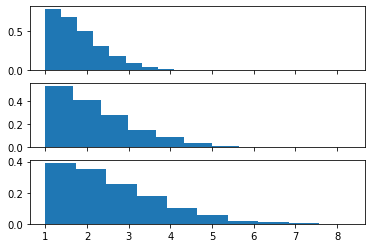

In [136]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

X = get_truncated_normal(mean=1, sd=1, low=1, upp=10)
int(X.rvs())
X1 = get_truncated_normal(mean=1, sd=1, low=1, upp=10)
X2 = get_truncated_normal(mean=1, sd=1.5, low=1, upp=10)
X3 = get_truncated_normal(mean=1, sd=2, low=1, upp=10)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), normed=True)
ax[1].hist(X2.rvs(10000), normed=True)
ax[2].hist(X3.rvs(10000), normed=True)
plt.show()